# Metallicity

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
### read in data
data = np.genfromtxt('ps5.txt',usecols = (0,7,8,10,11,12,13,14), dtype=[('Name','S12'),('D','f8'),\
        ('B','f8'),('EBV','f8'),('FUV','f8'),('e_FUV','f8'),('NUV','f8'),('e_NUV','f8')], unpack=True)

In [18]:
# check all galaxies have distance
print(np.where(data['D']==99.99))
print(np.where(data['EBV']==99.99))

(array([], dtype=int64),)
(array([], dtype=int64),)


In [13]:
# get existing B-band apparent magnitudes
np.where(data['B']==99.99)

(array([], dtype=int64),)

In [26]:
# convert to absolute magnitude
MB = data['B'] - 5.*np.log10(data['D']*10**5)

Now we convert to metallicity using Berg et al (2012): $12 + \log({\rm O/H}) = (6.27 ± 0.21) + (−0.11 ± 0.01)M_B$.

In [23]:
# convert to 12 + log(O/H)
met = 6.27 - 0.11 * MB

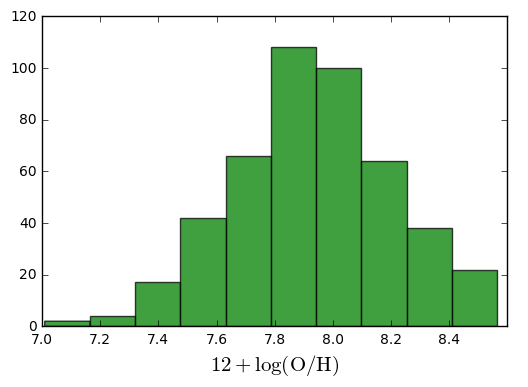

In [25]:
fig = plt.figure()
n, bins, patches = plt.hist(met, 10, normed=0, facecolor='green', alpha=0.75)
plt.xlabel(r'$12 + \log({\rm O/H})$', fontsize=15)
plt.show()